## Оценка параметров плотности распределения

Возьмем данные из прошлого задания и определим их математическое ожидание, дисперсию,
среднеквадратичное отклонение

In [1]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('train.csv')
y = data.SalePrice

In [14]:
y.shape

(1399,)

In [2]:
import numpy as np
q25 = np.percentile(y, 25)
q75 = np.percentile(y, 75)
IQR = q75 - q25
thehighest = q75 + (IQR * 1.5)
thelowest = q25 - (IQR * 1.5)
y = y.drop(y[(y > thehighest)|(y < thelowest)].index)

In [3]:
mo = y.mean()
var = y.var()
std = y.std()
print(f'Математическое ожидание выборки равно {mo}')
print(f'Дисперсия выборки равна {var}')
print(f'Среднеквадратичное отклонение выборки равно {std}')

Математическое ожидание выборки равно 170237.12723373837
Дисперсия выборки равна 3508208396.6347313
Среднеквадратичное отклонение выборки равно 59230.1308173022


Нарисуем гистрограмму и график плотности вероятности

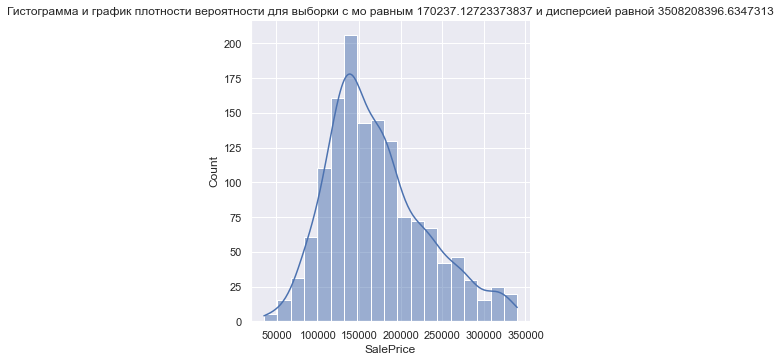

In [4]:
sns.set()
sns.displot(y, kde=True, bins = 19)\
.set(title=f'Гистограмма и график плотности вероятности для выборки с мо равным {mo} и дисперсией равной {var}')

Пусть три гипотетических вероятностных распределения для выборки будут:
- Нормальное; 
- Экспоненциальное; 
- Логарифмически-нормальное.

Рассмотрим нормальное распределение. Его функция распределения вероятности имеет следующий вид: <img src=norm.png  width="200">

Параметры данного распределения уже являются математическим ожиданием и дисперсией, так что рассчитывать ничего не нужно. 


Проверим данное распределение на соответствие нормальному

Для этого сгруппируем наши данные на интервалы и посчитаем количество вхождений значений в них с помощью функции numpy.histogram. Пусть количество интервалов будет 12. 

In [5]:
import numpy as np 
hist, _ = np.histogram(y, bins = 19)

Смоделируем нормальное распределение и тоже посчитаем частоту вхождений в интервалы. 

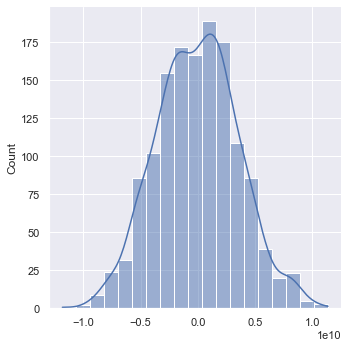

In [6]:
normal = np.random.normal(mo, var, y.shape[0])
normalhist, _ = np.histogram(normal, bins = 19 )
sns.displot(normal, kde=True, bins = 19)

Воспользуемся критерием хи-квадрат для оценки схожести двух распределений. 

In [20]:
from scipy.stats import chisquare
chi2, p = chisquare(hist, f_exp=normalhist)

In [27]:
print(f'Критерий хи-квадрат равен {chi2} с p-value {p}')

Критерий хи-квадрат равен 939.7078743520785 с p-value 0.05280222551860551


Проведем те же действия с экспонентациальным распределением. 

Его функция распределения вероятности имеет следующий вид: <img src=exp.png  width="100">

Величина L обратно пропорциональна математическому ожиданию, найдем ее

In [9]:
l = 1/mo

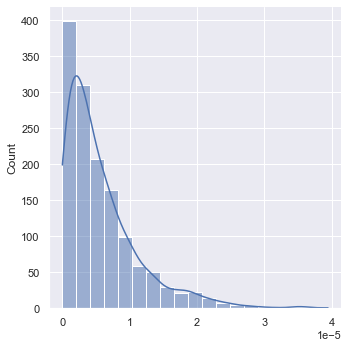

In [10]:
from scipy.stats import expon
e = expon.rvs(scale=l , size=y.shape[0] )
sns.displot(e, kde=True, bins = 19)

In [34]:
ehist, _ = np.histogram(e, bins = 19)
hist, _ = np.histogram(y, bins = 19)
chi2, p = chisquare(hist, ehist)
print(f'Критерий хи-квадрат равен {chi2} c p-value {p}')

Критерий хи-квадрат равен 8941.139110471 c p-value 0.8354184627381029


Проанализируем сходство с логарифмически-нормальным. Его функция распределения вероятности имеет следующий вид: <img src=lognorm.png  width="200">

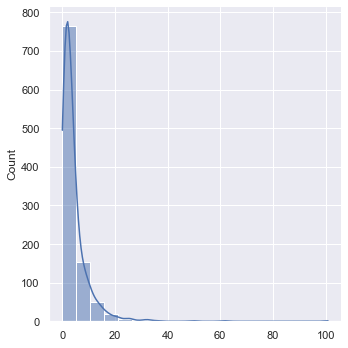

In [12]:
from scipy.stats import lognorm
import math
s = lognorm.rvs(s=1, scale=math.exp(1), size= 1000 )
sns.displot(s, kde=True, bins = 19)

In [33]:
loghist, _ = np.histogram(e, bins = 19)
hist, _ = np.histogram(y, bins = 19)
chi2, p= chisquare(hist, loghist)
print(f'Критерий хи-квадрат равен {chi2}  c p-value {p}')

Критерий хи-квадрат равен 8941.139110471  c p-value 0.9138083949298603


Можно сделать вывод, что наше распределение больше всего схоже с нормальным по значению хи-квадрат. 